# Demo for Exploring Catalyst Designs Using Cando
We are going to explore two catalyst designs to look for macromolecules that could wrap around a Zr-O metal cluster and leave open coordination sites that could bind and hydrolyze reactive phosphate esters.

### SOME NOTES: 
#### 1. Some/all of the interactive display windows are clipped and display a scroll-bar. This isn't good for interactive viewing.Solution: Right click on the window and select "Disable Scrolling For Outputs".
#### 2. To replay the calculations in this notebook: Select this cell and hit Shift-Enter to evaluate it. You can also evaluate all cells by going to Run > Run all cells. Some cells may take seconds to minutes to evaluate. Wait until output appears before moving on to the next cell.

<div class="alert alert-block alert-info">
    <b>Step 1:</b> <font color='black'>We start by loading in a chemdraw file of the X-Ray crystal structure of the Zr-O cluster. We will use the saved chemdraw file to build a three-dimensional structure of the catalyst design and wrap it around a Zr-O cluster to see if the resulting geometry is chemically reasonable. </font></div>

<div class="alert alert-block alert-success">
   <strong> Step 1A: </strong>Use the function *jupyter:png-file* to call a saved chemdraw file</strong>
</div>

##### This chemdraw structure for a designed molecule presents six carboxylic acids that could displace benzoic acids from a crystal structure of a Zr-O cluster.

###### Note: It turns out that this is a poor design - but suggests some ideas on how to make a better one. 

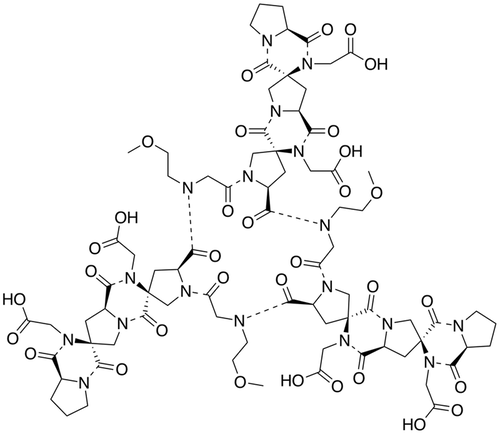

In [3]:
(jupyter:png-file "data/cat-design/trimer.png")

### Above is the loaded image of the 2D X-ray crystal structure of the Zr-O cluster.

It is surrounded by benzoic acid groups (I don't have the Cambridge Crystallographic Database accession number in hand when I created this demo).

<div class="alert alert-block alert-info">
    <b>Step 2:</b> <font color='black'>Load in the 3D molecule of the cluster</font></div>

<div class="alert alert-block alert-success">
   <strong> Step 2A: </strong>Use the command *defparameter* to assign the loaded molecule to an arbitrary variable name </strong>
</div> 

In [4]:
(defparameter *zr* (load-mol2 "data/cat-design/renamed-zrcluster.mol2"))

*ZR*

<div class="alert alert-block alert-success">
   <strong> Step 2B: </strong>Use the commands *defparameter* and *show* to create the image of the 3D molecule. </strong>
</div>  

In [5]:
(defparameter *zr-view* (show *zr*)) *zr-view*

*ZR-VIEW*

A Jupyter Widget

<div class="alert alert-block alert-info">
    <b>NOTE:</b> <font color='black'>You can view the structure and manipulate it using your mouse.</font></div>

Rotate the molecule by dragging the left mouse button (or trackpad) within the view below.

Zoom (two button drag scroll or scroll wheel).

Pick atoms (hover over an atom and left button click).

At the bottom right corner of the view above is a very small control, drag that to make the view larger or smaller.

Double click with left button to go full screen, hit Escape to return to browser.

<div class="alert alert-block alert-info">
    <b>Step 3:</b> <font color='black'>Load and build 3D coordinates of trimer</font></div>

<div class="alert alert-block alert-success">
   <strong> Step 3A: </strong>Use the command *defparameter* to load in a chemdraw aggregate and assign it to a variable</strong>
</div>

In [6]:
(defparameter *agg* (load-chem-draw-aggregate "data/cat-design/trimer.cdxml"))

*AGG*

<div class="alert alert-block alert-success">
   <strong> Step 3B: </strong>Use the chem commands *fill-in-implicit-hydrogens* and *build-unbuilt-hydrogens* to add the implicit and unbuilt hydrogens to the aggregate</strong>
</div>

The output of this cell will give you two values: the number of implicit and number of unbuilt hydrogens respectively.

In [7]:
(chem:fill-in-implicit-hydrogens *agg*)
(build-unbuilt-hydrogens *agg*)

0

96

<div class="alert alert-block alert-success">
   <strong> Step 3C: </strong>Use the command *show* to visualize the aggregate</strong>
</div>

Note: the structure has successfully loaded into Cando if the result has no depth.

In [8]:
(show *agg*)

A Jupyter Widget

<div class="alert alert-block alert-success">
   <strong> Step 3D: </strong>Use the commands *defparameter* and *sterocenters-sorted-by-name* to sort all all the aggregate's stereocenters and assign them to a variable.</strong>
</div>

In [9]:
(defparameter *stereocenters* (stereocenters-sorted-by-name *agg*))

*STEREOCENTERS*

<div class="alert alert-block alert-success">
   <strong> Step 3E: </strong>Use the command *set-all-stereocenters-to* to assign all the stereocenters to the S orientation</strong>
</div>Use the command *set-all-stereocenters-to* to assign all the stereocenters to the S orientation

In [10]:
(set-all-stereocenters-to *stereocenters* :S :show t)

NIL

C_108  S
C_110  S
C_133  S
C_135  S
C_158  S
C_227  S
C_229  S
C_237  S
C_239  S
C_247  S
C_322  S
C_324  S
C_332  S
C_334  S
C_342  S
15 stereocenters set


<div class="alert alert-block alert-success">
   <strong> Step 3F: </strong>Use the command *jostle* to randomly displace all the atoms. This will assist the energy minimization we do in later steps</strong>
</div>

In [11]:
(jostle *agg* 20)

NIL

<div class="alert alert-block alert-success">
   <strong> Step 3G: </strong>Use the command *show* to display the aggregate</strong>
</div>

Note: atoms are randomly jostled in space to break them out of "flatland". They now have depth

In [12]:
(show *agg*)

A Jupyter Widget

<div class="alert alert-block alert-info">
    <b>Step 4:</b> <font color='black'>Construct a chemically reasonable structure of the molecule by minimizing the conformation energy</font></div>

### This does a few things in sequence:
#### 1. Cando automatically assigns atom types
#### 2. Cando assigns Generalized Amber Force Field (GAFF) parameters
#### 3. Cando minimizes the energy of the structure, automatically switching between three energy minimizers to take advantage of their different speed/convergence characteristics.

<div class="alert alert-block alert-success">
   <strong> Step 4A: </strong> Call for a generalized force field using *easy-gaff*. </strong>
</div>

In [13]:
(easy-gaff)

#<FORCE-FIELD gaff.dat>

Warning!  Skipping 10-12 hbond in #<IOSTREAM-STREAM #P"/home/avadremann/anaconda3/envs/AmberTools22/dat/leap/parm/gaff.dat">
Warning!  Skipping force field atom equivalences in #<IOSTREAM-STREAM #P"/home/avadremann/anaconda3/envs/AmberTools22/dat/leap/parm/gaff.dat">
Adding force field gaff.dat to DEFAULT


#### Note: You can ignore the warnings above.

<div class="alert alert-block alert-success">
   <strong> Step 4B: </strong>Build the aggregate's unbuilt hydrogens using the command *build-unbuilt-hydrogens*</strong>
</div>

In [14]:
(build-unbuilt-hydrogens *agg*)

0

<div class="alert alert-block alert-success">
   <strong> Step 4C: </strong> Use the energy function *minimize*</strong>
</div>

In [15]:
(energy:minimize *agg* 
                 :restraints-on t
                 :max-sd-steps 5000
                 :sd-tolerance 5000.0
                 :max-cg-steps 1000)

======= Starting Steepest Descent Minimizer
 minSDnP       0    10     -7.87   0.0        6177047.082        4346963.911
 minSDnP       0    20     -8.79   0.0        4448353.754         802331.118
 minSDnP       0    30     -8.45   0.0        3965876.285         670922.718
 minSDnP       0    40     -8.28   0.0        3680780.982         372379.862
 minSDnP       0    50     -9.16   0.0        3493640.494         163296.970
 minSDnP       0    60     -9.23   0.0        3281596.357         143331.611
 minSDnP       0    70     -9.86   0.0        3012055.752        1120592.568
 minSDnP       0    80    -11.10   0.0        2913242.204          98208.567
 minSDnP       1    90    -10.99   0.0        2883105.998          81101.149
 minSDnP       1   100    -10.03   0.0        2722105.093         122380.356
 minSDnP       1   110     -8.06   0.0        2657013.337         425129.023
 minSDnP       1   120     -7.49   0.0        2556053.578         291451.408
 minSDnP       1   130     -7.57

#<ENERGY-FUNCTION >

<div class="alert alert-block alert-success">
   <strong> Step 4D: </strong> Use the function *show* to visualize the chemically reasonable three-dimensional structure of the molecule</strong>
</div>

In [16]:
(show *agg*)

A Jupyter Widget

In [46]:
(cando-jupyter:center-oon *agg* '(0.0 0.0 15.0))

SYMBOL-DOES-NOT-EXIST: Symbol named "CENTER-OON" not found in the CANDO-JUPYTER package.



SYMBOL-DOES-NOT-EXIST: Symbol named "CENTER-OON" not found in the CANDO-JUPYTER package.

In [18]:
(defparameter *design-view* (show *zr*))
(defparameter *cagg* (make-instance 'cando-structure :matter *agg*))
(nglv::add-structure *design-view* *cagg*)
*design-view*

*DESIGN-VIEW*

UNDEFINED-CLASS: Could not find the class CANDO-STRUCTURE.



UNDEFINED-CLASS: Could not find the class CANDO-STRUCTURE.

## You can select pairs of carboxylic acid carbons on the ligand and on the benzoic acids of the Zr-O cluster multiple times to build a mapping of atoms on the ligand to the cluster.  It's a bit tricky and takes a couple of tries to get it right.  The function below pulls out the mapping.

In [19]:
(defparameter *named-map* '((:C_350 . :C_2) (:C_354 . :C_1) 
                  (:C_255 . :C_7) (:C_259 . :C_8)
                  (:C_185 . :C_3) (:C_196 . :C_4)))

*NAMED-MAP*

In [20]:
(cando-jupyter:cartoon-atom-map *design-view* *named-map* *agg* *zr*)

SYMBOL-DOES-NOT-EXIST: Symbol named "CARTOON-ATOM-MAP" not found in the CANDO-JUPYTER package.



SYMBOL-DOES-NOT-EXIST: Symbol named "CARTOON-ATOM-MAP" not found in the CANDO-JUPYTER package.

## Scroll up and you should see magenta lines joining the pairs of atoms that are mapped on to each other.

### Next we are going to constrain the selected atoms from the trial catalyst to the Zr-O crystal structure.

In [21]:
(clear-all-atom-restraints *agg*)

NIL

In [22]:
(cando-jupyter:anchor-named-atom-map *named-map* *agg* *zr*)

SYMBOL-DOES-NOT-EXIST: Symbol named "ANCHOR-NAMED-ATOM-MAP" not found in the CANDO-JUPYTER package.



SYMBOL-DOES-NOT-EXIST: Symbol named "ANCHOR-NAMED-ATOM-MAP" not found in the CANDO-JUPYTER package.

In [23]:
(set-all-stereocenters-to *stereocenters* :S :show t)

NIL

C_108  S
C_110  S
C_133  S
C_135  S
C_158  S
C_227  S
C_229  S
C_237  S
C_239  S
C_247  S
C_322  S
C_324  S
C_332  S
C_334  S
C_342  S
15 stereocenters set


In [24]:
(energy:minimize *agg* 
                 :restraints-on t
                 :max-sd-steps 1000
                 :sd-tolerance 5000.0
                 :max-cg-steps 1000)

======= Starting Steepest Descent Minimizer
---Stage-Seconds--Step-log(Alpha)--Prev.dir--------Energy-----------RMSforce
 minSDnP       0     1      -inf  90.0            662.618              0.001
 ! DONE absolute force test:
 ! forceRmsMag(1.064424e-03) < forceTolerance(5.000000e+03)
======= Starting Conjugate Gradient Minimizer
---Stage-Seconds--Step-log(Alpha)--Prev.dir--------Energy-----------RMSforce
 minCGnP       0     1      -inf  90.0            662.618              0.001
 ! DONE absolute force test:
 ! forceRmsMag(1.064424e-03)<forceTolerance(1.000000e+02)
======= Starting Truncated Newton Minimizer
search complete step 2 according to b1bTest delta[1.896057e-03] < SQRT_EPSILONF*(1.0+rmsMagXKNext)/100.0 [5.706440e-03]
======= All three minimizers have completed or passed on minimization.


#<ENERGY-FUNCTION >

In [25]:
(show *agg*)

A Jupyter Widget

### It turns out that the structure above is a bad design - with lots of bad geometry.
# We can rule this design out and move on to another design with a larger macrocycle to better envelop the Zr-O cluster.

### Overlay of the trial above on the Zr-O cluster and looking at it closely can help us learn what is wrong with the design.

In [26]:
(defparameter *overlay-view* (show *zr*))
(defparameter *cagg* (make-instance 'cando-structure :matter *agg*))
(nglv::clear-representations *overlay-view*)
(nglv::add-representation *overlay-view* "hyperball")
(nglv::add-structure *overlay-view* *cagg*)
*overlay-view*

*OVERLAY-VIEW*

UNDEFINED-CLASS: Could not find the class CANDO-STRUCTURE.



UNDEFINED-CLASS: Could not find the class CANDO-STRUCTURE.

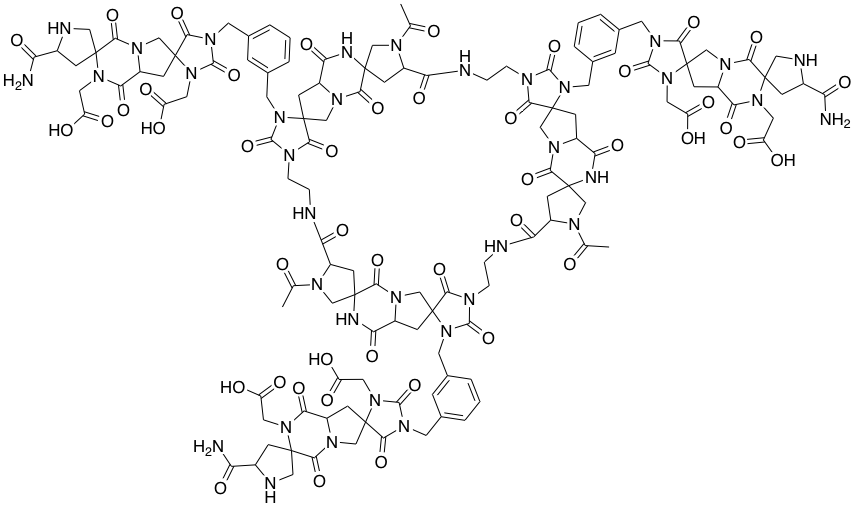

In [27]:
(jupyter:png-file "data/cat-design/trial-catalyst2.png")

In [28]:
(defparameter *agg2* (load-chem-draw-aggregate "data/cat-design/trial-catalyst2.cdxml"))

*AGG2*

In [29]:
(chem:fill-in-implicit-hydrogens *agg2*)
(build-unbuilt-hydrogens *agg2*)

0

138

In [30]:
(show *agg2*)

A Jupyter Widget

### The structure above is the Chemdraw structure with no depth.  It illustrates that the Chemdraw structure is loaded successfuly into Cando.

In [31]:
(defparameter *stereocenters2* (stereocenters-sorted-by-name *agg2*))

*STEREOCENTERS2*

In [32]:
(set-all-stereocenters-to *stereocenters2* :S :show t)

NIL

C_136  S
C_153  S
C_174  S
C_185  S
C_2    S
C_250  S
C_253  S
C_257  S
C_261  S
C_287  S
C_293  S
C_298  S
C_301  S
C_36   S
C_397  S
C_400  S
C_404  S
C_408  S
C_434  S
C_440  S
C_445  S
C_448  S
C_50   S
C_8    S
24 stereocenters set


In [33]:
(jostle *agg2* 20)

NIL

In [34]:
(show *agg2*)

A Jupyter Widget

In [35]:
(energy:minimize *agg2* 
                 :restraints-on t
                 :max-sd-steps 2000
                 :sd-tolerance 5000.0
                 :max-cg-steps 1000)

======= Starting Steepest Descent Minimizer
 minSDnP       0    10     -7.13   0.0        8115682.511       20311902.555
 minSDnP       0    20     -9.45   0.0        6142347.505         609881.514
 minSDnP       0    30     -9.14   0.0        5371189.653         273014.776
 minSDnP       1    40    -10.79   0.0        4827974.667         179403.987
 minSDnP       1    50     -8.97   0.0        4536880.148        3377581.529
 minSDnP       1    60     -8.57   0.0        4296748.552         858235.428
 minSDnP       1    70     -7.35   0.0        4085887.361         680881.682
 minSDnP       2    80     -8.17   0.0        3887064.458         341712.242
 minSDnP       2    90     -8.32   0.0        3753244.994         256094.277
 minSDnP       2   100     -8.12   0.0        3638856.519          86293.308
 minSDnP       2   110     -7.31   0.0        3533458.890         265190.063
 minSDnP       3   120     -7.50   0.0        3443312.585         221989.755
 minSDnP       3   130     -7.75

#<ENERGY-FUNCTION >

In [36]:
(show *agg2*)

A Jupyter Widget

In [37]:
(cando-jupyter:center-on *agg2* '(0.0 0.0 15.0))

SYMBOL-DOES-NOT-EXIST: Symbol named "CENTER-ON" not found in the CANDO-JUPYTER package.



SYMBOL-DOES-NOT-EXIST: Symbol named "CENTER-ON" not found in the CANDO-JUPYTER package.

In [38]:
(defparameter *design-view2* (show *zr*))
(defparameter *cagg2* (make-instance 'cando-structure :matter *agg2*))
(nglv::add-structure *design-view2* *cagg2*)
*design-view2*

*DESIGN-VIEW2*

UNDEFINED-CLASS: Could not find the class CANDO-STRUCTURE.



UNDEFINED-CLASS: Could not find the class CANDO-STRUCTURE.

In [39]:
(defparameter *named-map2* '((:C_452 . :C_8) (:C_458 . :C_7) 
                    (:C_198 . :C_5) (:C_219 . :C_6)
                    (:C_305 . :C_4) (:C_311 . :C_3)))

*NAMED-MAP2*

In [40]:
(cando-jupyter:cartoon-atom-map *design-view2* *named-map2* *agg2* *zr*)

SYMBOL-DOES-NOT-EXIST: Symbol named "CARTOON-ATOM-MAP" not found in the CANDO-JUPYTER package.



SYMBOL-DOES-NOT-EXIST: Symbol named "CARTOON-ATOM-MAP" not found in the CANDO-JUPYTER package.

## Scroll up and you should see magenta lines joining the pairs of atoms that are mapped on to each other.

### Next we are going to constrain the selected atoms from the trial catalyst to the Zr-O crystal structure.

In [41]:
(clear-all-atom-restraints *agg2*)

NIL

In [42]:
(cando-jupyter:anchor-named-atom-map *named-map2* *agg2* *zr*)

SYMBOL-DOES-NOT-EXIST: Symbol named "ANCHOR-NAMED-ATOM-MAP" not found in the CANDO-JUPYTER package.



SYMBOL-DOES-NOT-EXIST: Symbol named "ANCHOR-NAMED-ATOM-MAP" not found in the CANDO-JUPYTER package.

In [43]:
(set-all-stereocenters-to *stereocenters2* :S :show t)

NIL

C_136  S
C_153  S
C_174  S
C_185  S
C_2    S
C_250  S
C_253  S
C_257  S
C_261  S
C_287  S
C_293  S
C_298  S
C_301  S
C_36   S
C_397  S
C_400  S
C_404  S
C_408  S
C_434  S
C_440  S
C_445  S
C_448  S
C_50   S
C_8    S
24 stereocenters set


In [44]:
(energy:minimize *agg2* 
                 :restraints-on t
                 :max-sd-steps 2000
                 :sd-tolerance 5000.0
                 :max-cg-steps 1000)

======= Starting Steepest Descent Minimizer
---Stage-Seconds--Step-log(Alpha)--Prev.dir--------Energy-----------RMSforce
 minSDnP       0     1      -inf  90.0           1541.721              0.013
 ! DONE absolute force test:
 ! forceRmsMag(1.304476e-02) < forceTolerance(5.000000e+03)
======= Starting Conjugate Gradient Minimizer
---Stage-Seconds--Step-log(Alpha)--Prev.dir--------Energy-----------RMSforce
 minCGnP       0     1      -inf  90.0           1541.721              0.013
 ! DONE absolute force test:
 ! forceRmsMag(1.304476e-02)<forceTolerance(1.000000e+02)
======= Starting Truncated Newton Minimizer
search complete step 2 according to b1bTest delta[5.263760e-03] < SQRT_EPSILONF*(1.0+rmsMagXKNext)/100.0 [5.696282e-03]
======= All three minimizers have completed or passed on minimization.


#<ENERGY-FUNCTION >

In [45]:
(show *agg2*)

A Jupyter Widget

### This may be a better design.
### It's going to take more work to establish this.
### A build-tree will be constructed and ligands will be restrained to mimic the benzoic acids from the Zr-O cluster.
### 1) Rotatable bonds will be twisted.
### 2) Stereocenters will be flipped.
### 3) Functional groups will be varied.
### While scoring the conformational energy to find an optimal design.

## That's it for now - anything more sophisticated requires setting up more designs and running more sophisticated calculations on super-computers.
## This user interface can drive 100,000s of copies of Cando running on large super-computers.